In [1]:
# these packages are used in our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import geopy.distance as geo
import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
%matplotlib inline

In [2]:
df3 = pd.read_csv("data/master_data_2.csv")

In [3]:
grade_redux = df3[["price","grade","sqft_living"]]

In [4]:
formula = 'price ~ grade'

grade_model = ols(formula=formula, data=grade_redux).fit()
grade_model_summary = grade_model.summary()
grade_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.670e+04
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:42:03   Log-Likelihood:            -2.9362e+05
No. Observations:               21059   AIC:                         5.872e+05
Df Residuals:                   21057   BIC:                         5.873e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.069e+06   1.26e+04    -84.939      0.000   -1.09e+06   -1.04e+06
grade       2.102e+05   1626.119    129.236      0.000    2.07e+05    2.13e+05
==============================================================================
Omnibus:                    19418.526   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1995480.289
Skew:                           4.093   Prob(JB):                         0.00
Kurtosis:                      49.980   Cond. No.                         52.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
avg_price_by_grade = grade_redux.groupby(['grade']).mean(['price','sqft_living'])
ind = avg_price_by_grade.index
avg_price_by_grade["price_per_sqft_liv"] = avg_price_by_grade['price']/avg_price_by_grade['sqft_living']

avg_price_by_grade


,price,sqft_living,price_per_sqft_liv
grade,,,
3,2.620000e+05,520.000000,503.846154
4,2.120019e+05,680.740741,311.428183
5,2.465284e+05,981.955752,251.058557
6,3.010554e+05,1187.637011,253.491116
7,4.017706e+05,1685.044310,238.433244
8,5.429744e+05,2180.707963,248.989968
9,7.754414e+05,2857.240602,271.395217
10,1.077081e+06,3510.118613,306.850393
11,1.505098e+06,4371.023810,344.335417


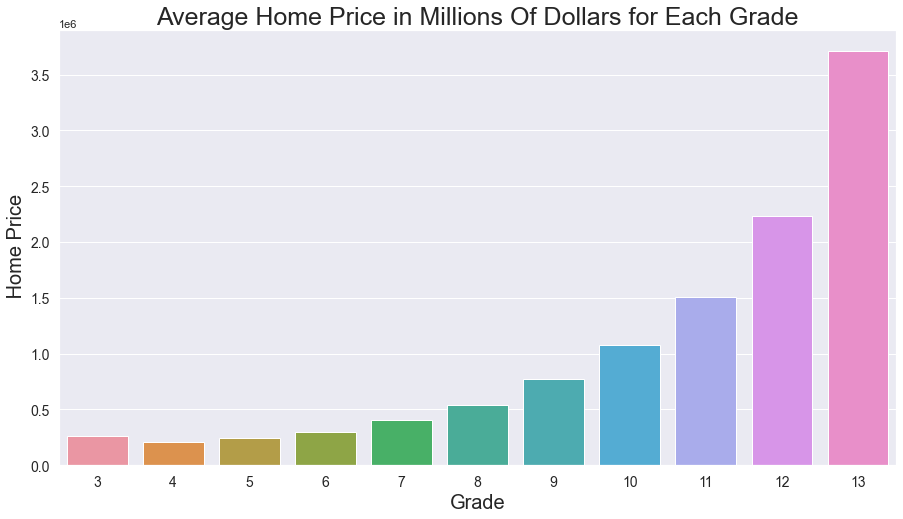

In [15]:

ax = sns.barplot(x = ind,  y = avg_price_by_grade["price"])
sns.set(rc = {'figure.figsize': (24,18)})
ax.set_xlabel("Grade", fontsize = 20)
ax.set_ylabel(" Home Price", fontsize = 20)
ax.set_title("Average Home Price in Millions Of Dollars for Each Grade", fontsize = 25)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18);
plt.tick_params(axis='both', which='major', labelsize=14)


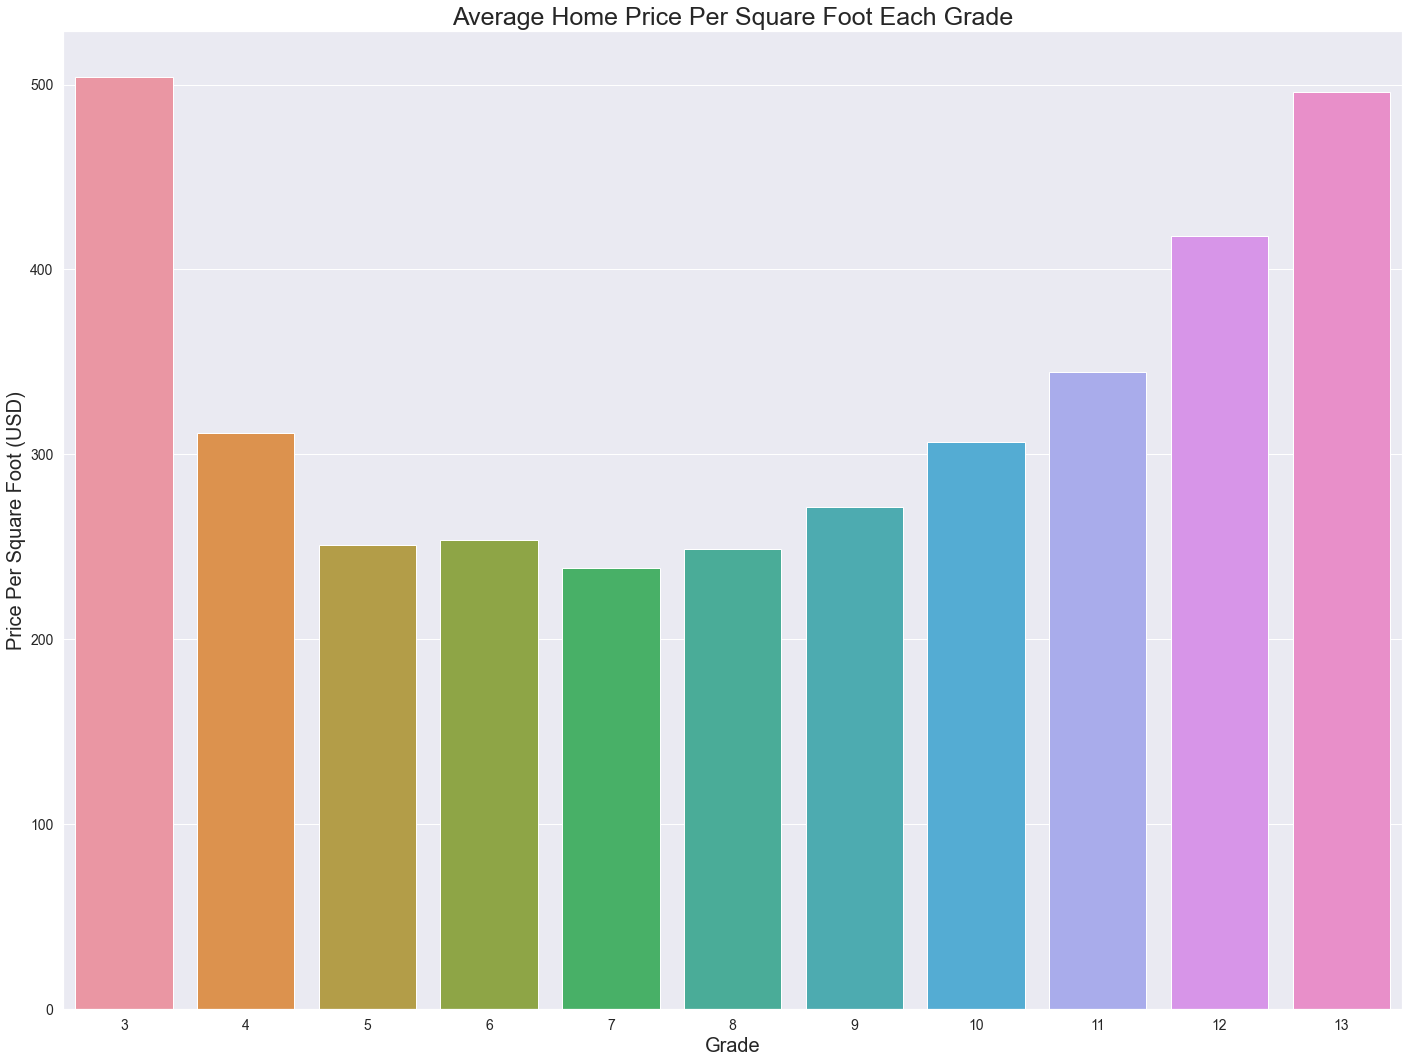

In [16]:

ax = sns.barplot(x = ind,  y = avg_price_by_grade["price_per_sqft_liv"])
sns.set(rc = {'figure.figsize': (24,18)})
ax.set_xlabel("Grade", fontsize = 20)
ax.set_ylabel("Price Per Square Foot (USD)", fontsize = 20)
ax.set_title("Average Home Price Per Square Foot Each Grade", fontsize = 25)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18);
plt.tick_params(axis='both', which='major', labelsize=14)


In [8]:
avg_price_by_grade["percent_change_by_grade"] = avg_price_by_grade["price_per_sqft_liv"].pct_change() * 100

    

In [9]:
avg_price_by_grade

,price,sqft_living,price_per_sqft_liv,percent_change_by_grade
grade,,,,
3,2.620000e+05,520.000000,503.846154,NaN
4,2.120019e+05,680.740741,311.428183,-38.189826
5,2.465284e+05,981.955752,251.058557,-19.384767
6,3.010554e+05,1187.637011,253.491116,0.968921
7,4.017706e+05,1685.044310,238.433244,-5.940197
8,5.429744e+05,2180.707963,248.989968,4.427539
9,7.754414e+05,2857.240602,271.395217,8.998454
10,1.077081e+06,3510.118613,306.850393,13.064039
11,1.505098e+06,4371.023810,344.335417,12.216059


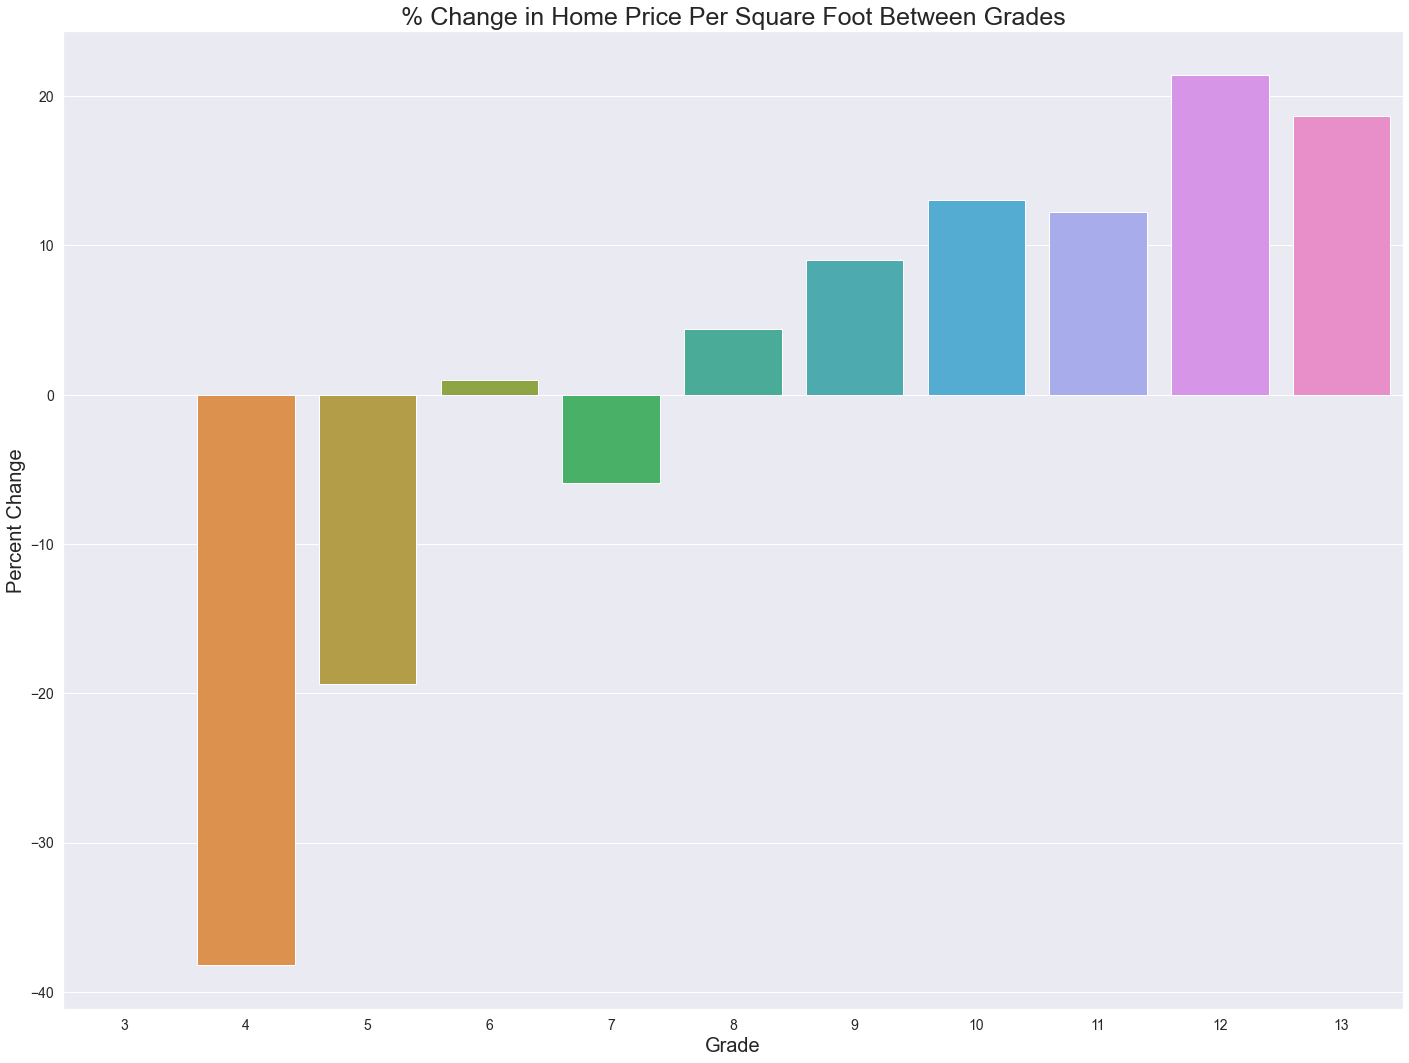

In [17]:

ax = sns.barplot(x=ind, y = avg_price_by_grade.percent_change_by_grade)
sns.set(rc = {'figure.figsize': (24,18)})
ax.set_xlabel("Grade", fontsize = 20)
ax.set_ylabel("Percent Change", fontsize = 20)
ax.set_title("% Change in Home Price Per Square Foot Between Grades", fontsize = 25)
# ax.set_xticks(range(3,13,1))
plt.tick_params(axis='both', which='major', labelsize=14)
